In [18]:
from pbpstats.client import Client
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation 
import networkx as nx
import numpy as np
import pandas as pd
from pyvis.network import Network
import time
from nba_api.stats.endpoints import commonteamroster

settings = {
    "dir": "response_data",
    "Games": {"source": "file", "data_provider": "data_nba"},
    "Possessions": {"source": "file", "data_provider": "data_nba"},
    "EnhancedPbp": {"source": "file", "data_provider": "data_nba"}
}

client = Client(settings)
s = client.Season("wnba", "2022", "Regular Season")

# Read dictionary keyed by team names and valued by team IDs
with open('../Team Info/WNBA_teams_dict.txt','r') as f:
    team_names_dict = eval(f.read())

team_ids_dict = {v:k for k,v in team_names_dict.items()}
team_ids_dict

{1611661319: 'Aces',
 1611661329: 'Sky',
 1611661323: 'Sun',
 1611661328: 'Storm',
 1611661322: 'Mystics',
 1611661321: 'Wings',
 1611661313: 'Liberty',
 1611661317: 'Mercury',
 1611661324: 'Lynx',
 1611661330: 'Dream',
 1611661320: 'Sparks',
 1611661325: 'Fever'}

In [19]:
game_data  = s.games.items[-3].data
game = client.Game(game_data['game_id'])
rosters = {}
networks = {}
frames = len(game.enhanced_pbp.items)

for team in ['home', 'away']:
    r = commonteamroster.CommonTeamRoster(season="2022", team_id=game_data[team+'_team_id'],league_id_nullable='10').get_data_frames()[0]
    rosters[game_data[team+'_team_id']] = dict(zip(r['PLAYER_ID'].tolist(),r['PLAYER'].tolist()))

    # Initialize team networks
    networks[game_data[team+'_team_id']] = nx.complete_graph(game.enhanced_pbp.items[0].current_players[game_data[team+'_team_id']])
    nx.set_edge_attributes(networks[game_data[team+'_team_id']],0,'weight')
    

SEA = 1611661328
LVA = 1611661319

In [11]:
rosters[LVA]

{1629498: 'Jackie Young',
 1631006: 'Kierstan Bell',
 203029: 'Riquna Williams',
 1631013: 'Aisha Sheppard',
 204324: 'Dearica Hamby',
 1628276: 'Kelsey Plum',
 203833: 'Chelsea Gray',
 1630387: 'Iliana Rupert',
 1628932: "A'ja Wilson",
 204329: 'Kiah Stokes',
 202641: 'Sydney Colson',
 203849: 'Theresa Plaisance'}

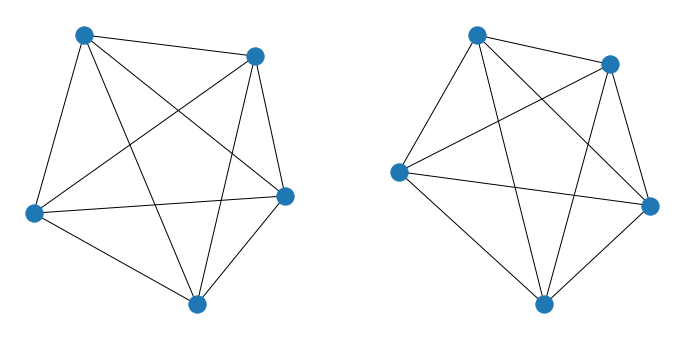

In [20]:
fig, ax = plt.subplots(1,2,figsize=(12,6))



plt.sca(ax[0])
nx.draw(networks[LVA])
plt.sca(ax[1])
nx.draw(networks[SEA])

def animate(frame):
    shot = game.enhanced_pbp.fgms[frame]
    fig.clear()
    shooting_team = shot.data['team_id']
    shooting_team_network = networks[shooting_team]
    shooting_team_network.add_edges_from(nx.complete_graph(shot.current_players[shooting_team]).edges())
    if shot.data["player1_id"] in shooting_team_network.nodes:
        shooter = shot.data["player1_id"]
        for player in shot.current_players[shooting_team]:
            if player != shooter and player in shot.current_players[shooting_team]:
                try:
                    networks[shooting_team][player][shooter]['weight'] += shot.shot_data["ShotValue"]
                except:
                    networks[shooting_team][player][shooter]['weight'] = shot.shot_data["ShotValue"]
    nx.draw(shooting_team_network,pos=nx.circular_layout(shooting_team_network),width=list(nx.get_edge_attributes(shooting_team_network,'weight').values()))

#ani = FuncAnimation(fig, animate, frames=frames, interval=1000, repeat=True)

plt.show()

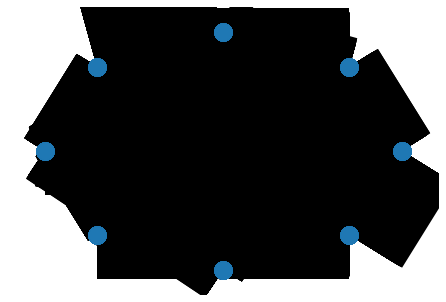

In [118]:
for shot in game.enhanced_pbp.fgms:
    shooting_team = shot.data['team_id']
    shooting_team_network = networks[shooting_team]
    shooting_team_network.add_edges_from(nx.complete_graph(shot.current_players[shooting_team]).edges())
    if shot.data["player1_id"] in shooting_team_network.nodes:
        shooter = shot.data["player1_id"]
        for player in shot.current_players[shooting_team]:
            if player != shooter and player in shot.current_players[shooting_team]:
                try:
                    networks[shooting_team][player][shooter]['weight'] += shot.shot_data["ShotValue"]
                except:
                    networks[shooting_team][player][shooter]['weight'] = shot.shot_data["ShotValue"]
    if shooting_team == LVA:
        fig.clear()
        nx.draw(shooting_team_network,pos=nx.circular_layout(shooting_team_network),width=list(nx.get_edge_attributes(shooting_team_network,'weight').values()))
    time.sleep(0.1)


In [16]:
vals = []
nums = vals
nums.append(1)
vals

[1]

In [ ]:
  
# Increase the appropriate edges for each made free throw
for ft in game.enhanced_pbp.ftas:
    shooting_team = ft.data['team_id']
    if ft.is_made and ft.data['player1_id'] in IDs[shooting_team]:
        shooter = ft.data["player1_id"]
        for player in ft.event_for_efficiency_stats.current_players[shooting_team]:
            if player != shooter and player in IDs[shooting_team]:
                networks[shooting_team][player][shooter]['weight'] += 1
print(team_ids_dict[team1],' versus ',team_ids_dict[team2])

KeyError: 6

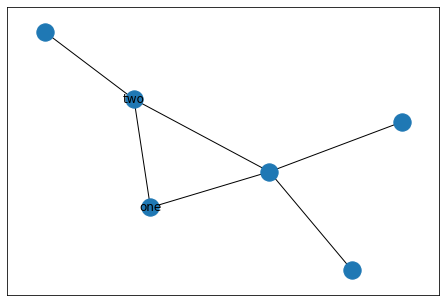

In [5]:
a = nx.star_graph(4)
nx.set_edge_attributes(a,2,'weight')
a.add_edges_from([(2,5,{'weight':3}),(1,2,{'weight':1})])
labels = {1:'one',2:'two',6:'six'}
nx.draw(a,with_labels=True,labels=labels)
a.edges(data=True)
nx.get_edge_attributes(a,'weight')

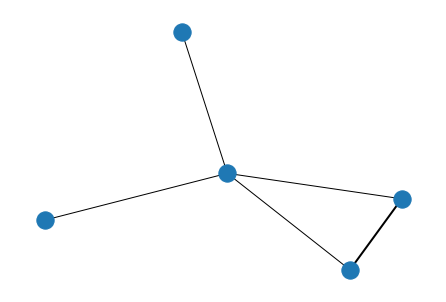

In [106]:
w=nx.get_edge_attributes(a,'weight').values()
nx.draw(a,width=list(w))